<a href="https://colab.research.google.com/github/priyankagc247/Virtual-Memory-Simulation-Tool/blob/master/Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Download darknet
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14421, done.
remote: Total 14421 (delta 0), reused 0 (delta 0), pack-reused 14421
Receiving objects: 100% (14421/14421), 13.16 MiB | 8.13 MiB/s, done.
Resolving deltas: 100% (9806/9806), done.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [ ]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-11-19 05:44:18--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  1.26MB/s    in 2m 38s  

2020-11-19 05:46:57 (1.50 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x

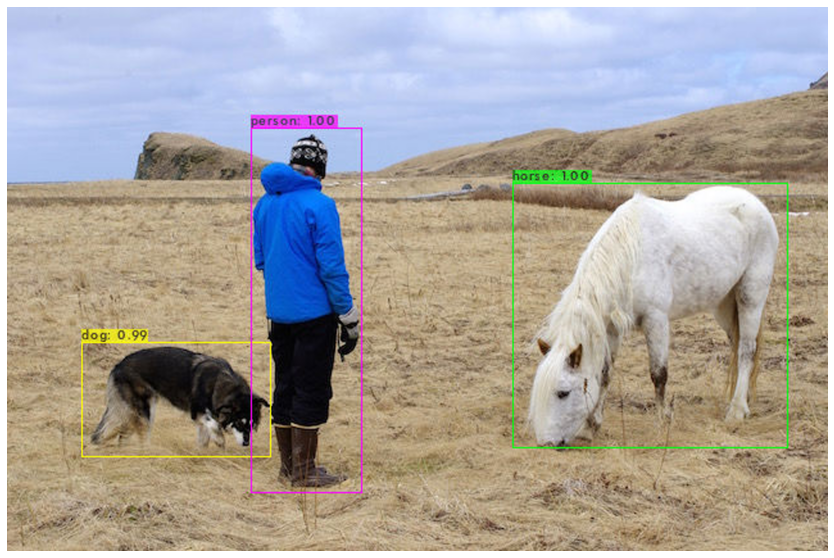

In [ ]:
# run darknet detection using sample image file
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg
# show image using our helper function
imShow('predictions.jpg')

In [ ]:
# This stops 'Run all' at this cell by causing an error
assert False

AssertionError: ignored

In [ ]:
# Mount Google Drive
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Mounted at /content/gdrive


In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

 Admission_Priyanka   'Engineering Syllabus & Documents'  'Piyu Documents'
 Books		       Girish				   Pryanka_Project_2
 Certification	       Lor				   SDSU
'Colab Notebooks'     "Master's Transcript"		   Seju_Documents
 CSUF		       Misc				  'TCS Documents'
 CSUF_1st_Semwster    'New folder'			   Yamini
 Embedded_Homework_3   ObjectDetection


In [ ]:
%cd darknet
!wget http://pjreddie.com/media/files/darknet53.conv.74

/content/darknet
URL transformed to HTTPS due to an HSTS policy
--2020-11-19 05:52:23--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  2.78MB/s    in 1m 54s  

2020-11-19 05:54:18 (1.35 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
!mkdir data/obj

In [ ]:
# upload the custom .cfg to cloud VM from Google Drive
!cp /mydrive/ObjectDetection/yolov3/yolov3-custom.cfg ./cfg

# upload obj.names to cloud VM from Google Drive
!cp /mydrive/ObjectDetection/yolov3/obj.names ./data

# upload the obj.data to cloud VM from Google Drive
!cp /mydrive/ObjectDetection/yolov3/obj.data ./data

# upload the trained labels and images to cloud VM from Google Drive
!cp /mydrive/ObjectDetection/yolov3/obj/* ./data/obj

# upload the train.txt back to cloud VM from Google Drive

!cp /mydrive/ObjectDetection/yolov3/train.txt ./data

# upload the text.txt to cloud VM from Google Drive
!cp /mydrive/ObjectDetection/yolov3/test.txt ./data

In [ ]:
# train your custom detector
!./darknet detector train data/obj.data cfg/yolov3-custom.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.929939, GIOU: 0.929234), Class: 0.999862, Obj: 0.999039, No Obj: 0.000867, .5R: 1.000000, .75R: 1.000000, count: 16, class_loss = 0.000007, iou_loss = 0.013747, total_loss = 0.013754 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000005, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 111261, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000002, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.905824, GIOU: 0.902093), Class: 0.999715, Obj: 0.934192, No Obj

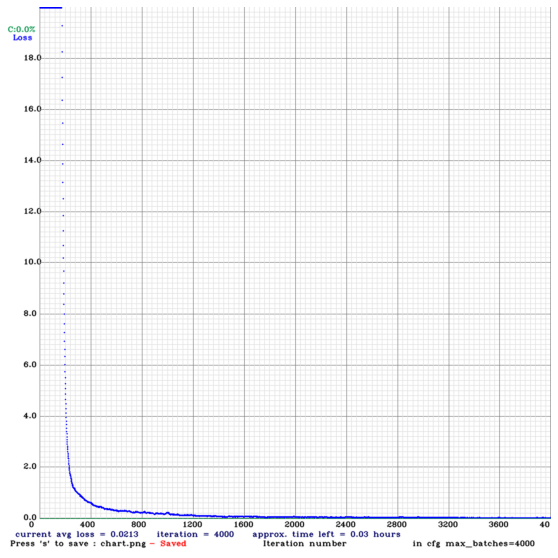

In [ ]:
imShow('chart.png')


In [ ]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=32/batch=1/' yolov3-custom.cfg
!sed -i 's/subdivisions=2/subdivisions=1/' yolov3-custom.cfg
%cd ..

/content/darknet/cfg
/content/darknet


# **Steps for Object detection Test:**

1. Mount Google Drive
2. Copy darknet and train and test content to google colab VM  
3. Make darknet executable by changing file permission
2. Run darknet test command to detect object






In [ ]:
# Mount Google Drive
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Mounted at /content/gdrive


In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

 Admission_Priyanka		    'Norton Installation Files.lnk'
 Books				     ObjectDetection
 Certification			    'Piyu Documents'
'Colab Notebooks'		     Resume
'Engineering Syllabus & Documents'   Seju_Documents
 Girish				     tb-clinical-assessment2021-converted.docx
 Lor				     tb-clinical-assessment2021.pdf
"Master's Transcript"		    'TCS Documents'
 Misc				     Yamini


In [ ]:
#Create directory
!mkdir /content/darknet/

In [ ]:
# Copy Drive backup to VM

!cp -r /mydrive/ObjectDetection/darknet/* /content/darknet/


In [ ]:
cd /content/darknet/

/content/darknet


In [ ]:
#Make darknet file executable
!chmod 755  /content/darknet/darknet

In [ ]:
cd /content/darknet/

/content/darknet


In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

 CUDA-version: 10010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 B

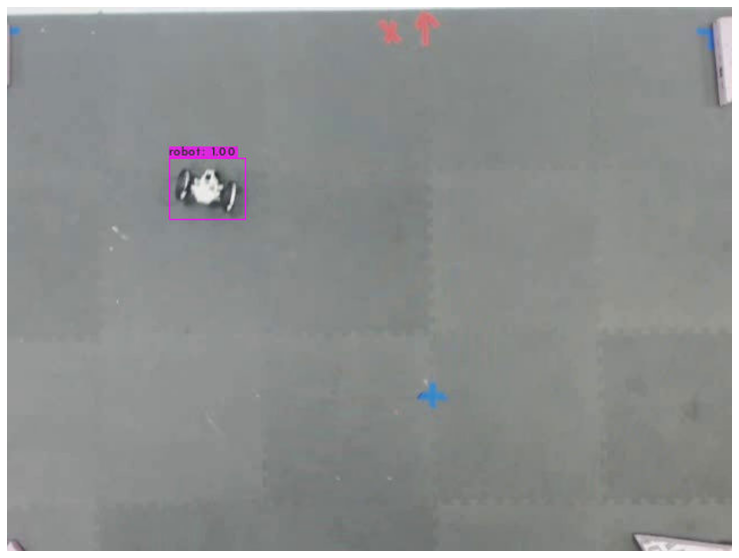

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3-custom.cfg /mydrive/ObjectDetection/yolov3/backup/yolov3-custom_final.weights /mydrive/ObjectDetection/images/test/trainImage280.jpg  -thresh 0.3
imShow('predictions.jpg')

# **Detect the robot in the video**




In [ ]:
!cp /mydrive/ObjectDetection/videos/test/Video_to_test.avi /content/darknet/

In [ ]:
!./darknet detector demo data/obj.data cfg/yolov3-custom.cfg /mydrive/ObjectDetection/yolov3/backup/yolov3-custom_final.weights -dont_show -ext_output /mydrive/ObjectDetection/videos/test/Video_to_test.avi -out_filename /mydrive/ObjectDetection/videos/test/robot.avi

 CUDA-version: 10010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
Demo
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.

In [ ]:
# Copy VM backup to Drive
!cp -r /content/darknet/* /mydrive/ObjectDetection/darknet/